# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


# Load the provided datasets

In [2]:
train_data = pd.read_csv('input/data/train.csv')
test_data = pd.read_csv('input/data/test.csv')
sample_submission = pd.read_csv('input/data/sample_submission.csv')

# Display the first few rows of each dataset

In [3]:
train_data.head(), test_data.head(), sample_submission.head()

(           model  year motor_type        running wheel    color   type  \
 0         toyota  2022     petrol       3000  km  left  skyblue  sedan   
 1  mercedes-benz  2014     petrol     132000  km  left    black  sedan   
 2            kia  2018     petrol   95000  miles  left    other  sedan   
 3  mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
 4  mercedes-benz  2017     petrol     130000  km  left    black  sedan   
 
       status  motor_volume  price  
 0  excellent           2.0  24500  
 1  excellent           2.0  25500  
 2  excellent           2.0  11700  
 3  excellent           3.2  12000  
 4       good           2.0  26000  ,
    Id          model  year motor_type       running wheel   color       type  \
 0   0            kia  2020     petrol     24000  km  left   black      sedan   
 1   1         nissan  2017     petrol  85000  miles  left   white        suv   
 2   2        hyundai  2021     petrol  30000  miles  left   white      sedan   
 

# Check for missing values

In [4]:
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

# Descriptive statistics for the numerical columns

In [5]:
desc_train = train_data.describe()

# Visualizing the correlation between numerical features in the train dataset

In [6]:
# Select only the numeric columns from the train data
numeric_columns = train_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_columns.corr()

# Plotting the correlation heatmap

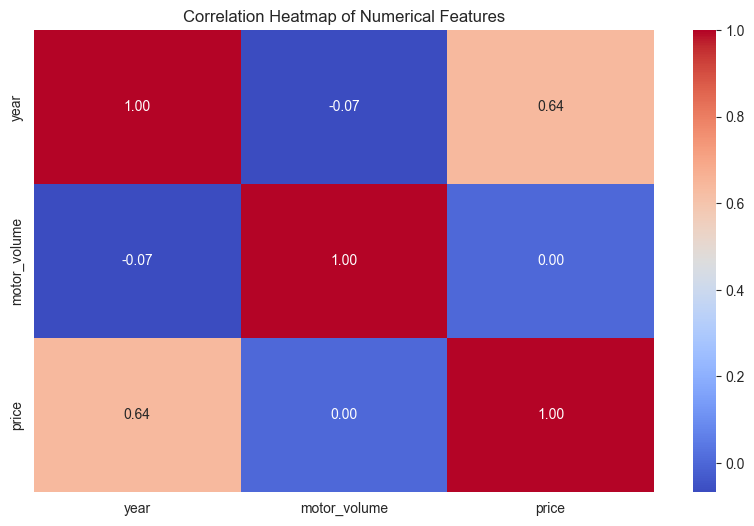

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Displaying missing values and descriptive statistics

In [8]:
missing_values_train, missing_values_test, desc_train.head()

(model           0
 year            0
 motor_type      0
 running         0
 wheel           0
 color           0
 type            0
 status          0
 motor_volume    0
 price           0
 dtype: int64,
 Id              0
 model           0
 year            0
 motor_type      0
 running         0
 wheel           0
 color           0
 type            0
 status          0
 motor_volume    0
 dtype: int64,
               year  motor_volume         price
 count  1642.000000   1642.000000   1642.000000
 mean   2014.805725      2.035018  15982.633374
 std       6.587573      0.253069   7176.084647
 min    1987.000000      0.200000    462.000000
 25%    2013.000000      2.000000  12000.000000)

# OneHotEncoder to handle unseen labels

In [9]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder to the 'running' column in the training data and transform both train and test data

In [10]:
train_running_encoded = encoder.fit_transform(train_data[['running']])
test_running_encoded = encoder.transform(test_data[['running']])

# Convert the encoded results into DataFrames for better readability

In [11]:
train_running_df = pd.DataFrame(train_running_encoded, columns=encoder.get_feature_names_out(['running']))
test_running_df = pd.DataFrame(test_running_encoded, columns=encoder.get_feature_names_out(['running']))

# Replace the original 'running' column with the one-hot encoded columns

In [12]:
train_data = pd.concat([train_data.drop(columns=['running']), train_running_df], axis=1)
test_data = pd.concat([test_data.drop(columns=['running']), test_running_df], axis=1)

# Checking the cleaned and encoded data

In [13]:
train_data.head(), test_data.head()

(           model  year motor_type wheel    color   type     status  \
 0         toyota  2022     petrol  left  skyblue  sedan  excellent   
 1  mercedes-benz  2014     petrol  left    black  sedan  excellent   
 2            kia  2018     petrol  left    other  sedan  excellent   
 3  mercedes-benz  2002     petrol  left   golden  sedan  excellent   
 4  mercedes-benz  2017     petrol  left    black  sedan       good   
 
    motor_volume  price  running_10  km  ...  running_97000  miles  \
 0           2.0  24500             0.0  ...                   0.0   
 1           2.0  25500             0.0  ...                   0.0   
 2           2.0  11700             0.0  ...                   0.0   
 3           3.2  12000             0.0  ...                   0.0   
 4           2.0  26000             0.0  ...                   0.0   
 
    running_97500  miles  running_98000  km  running_98000  miles  \
 0                   0.0                0.0                   0.0   
 1          

# Visualizing the distribution of car prices

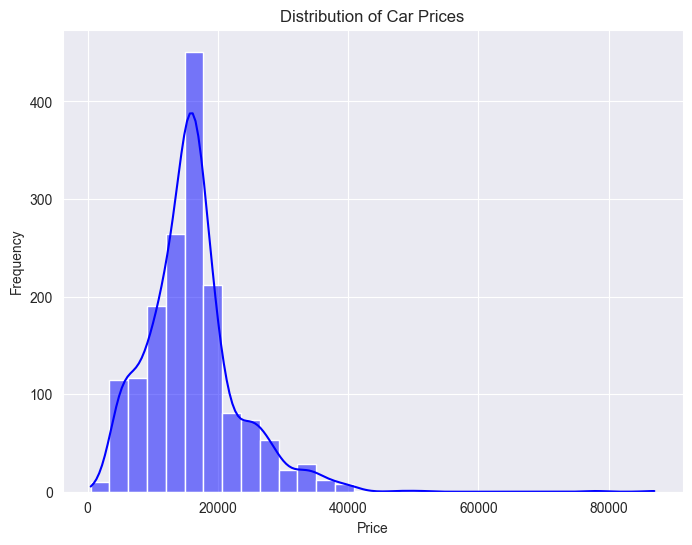

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualizing the relationship between 'price' and 'year'

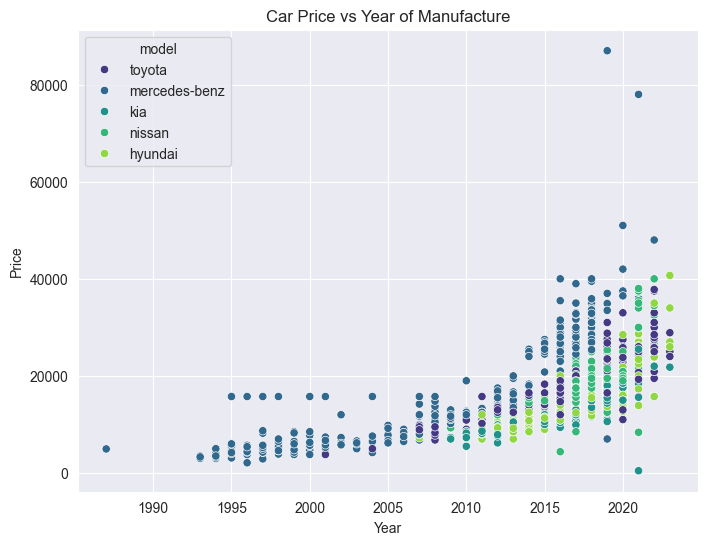

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='year', y='price', hue='model', palette='viridis')
plt.title('Car Price vs Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Visualizing the relationship between 'price' and 'motor_volume'

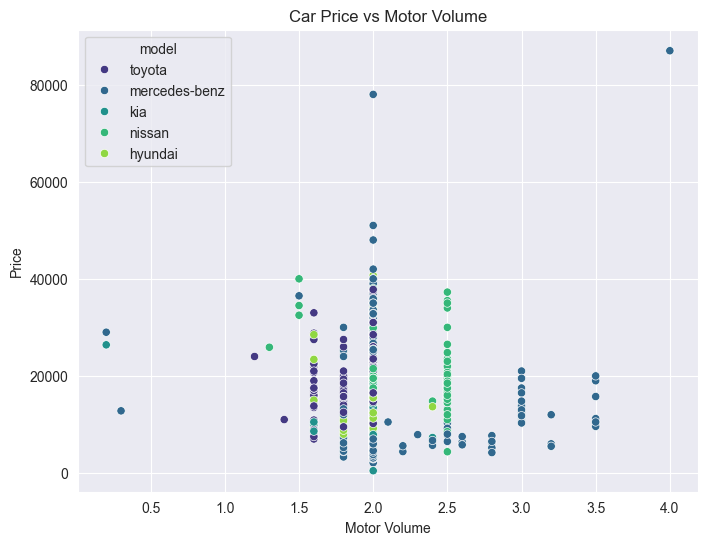

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='motor_volume', y='price', hue='model', palette='viridis')
plt.title('Car Price vs Motor Volume')
plt.xlabel('Motor Volume')
plt.ylabel('Price')
plt.show()

# Visualizing the correlation heatmap for numerical features

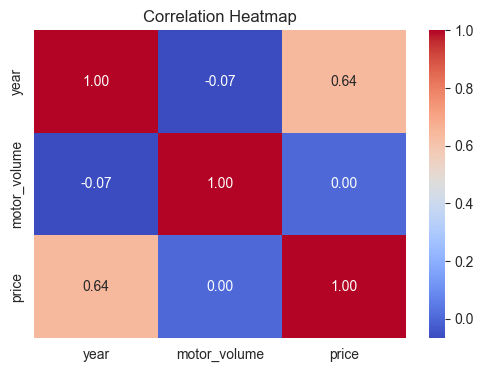

In [17]:
corr_matrix = train_data[['year', 'motor_volume', 'price']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualizing price vs running (one-hot encoded categories for running)

In [18]:
# Check the column names after encoding
train_data.columns, test_data.columns

(Index(['model', 'year', 'motor_type', 'wheel', 'color', 'type', 'status',
        'motor_volume', 'price', 'running_10  km',
        ...
        'running_97000  miles', 'running_97500  miles', 'running_98000  km',
        'running_98000  miles', 'running_98400  miles', 'running_98700  miles',
        'running_99000  km', 'running_99000  miles', 'running_99755  miles',
        'running_99950  miles'],
       dtype='object', length=652),
 Index(['Id', 'model', 'year', 'motor_type', 'wheel', 'color', 'type', 'status',
        'motor_volume', 'running_10  km',
        ...
        'running_97000  miles', 'running_97500  miles', 'running_98000  km',
        'running_98000  miles', 'running_98400  miles', 'running_98700  miles',
        'running_99000  km', 'running_99000  miles', 'running_99755  miles',
        'running_99950  miles'],
       dtype='object', length=652))

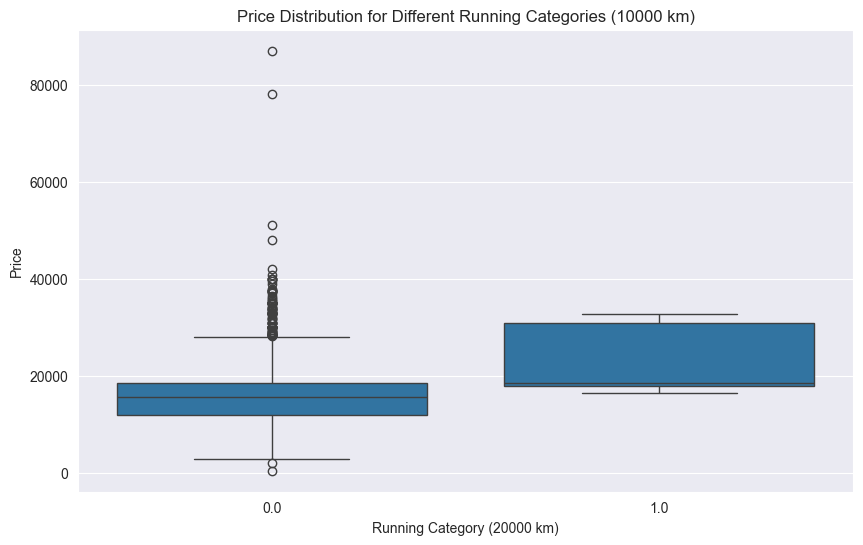

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='running_20000  km', y='price')
plt.title('Price Distribution for Different Running Categories (10000 km)')
plt.xlabel('Running Category (20000 km)')
plt.ylabel('Price')
plt.show()


# Model Development

In [20]:
# Define the categorical columns to be encoded
categorical_columns = ['model', 'motor_type', 'wheel', 'color', 'type', 'status']

# Create a dictionary for each categorical column to map categories to integers
for col in categorical_columns:
    # Get the unique values in the training data for the column
    unique_values = train_data[col].unique()
    
    # Create a dictionary that maps the unique values to integers
    label_mapping = {label: idx for idx, label in enumerate(unique_values)}
    
    # Apply the mapping to the train data
    train_data[col] = train_data[col].map(label_mapping)
    
    # For the test data, apply the mapping
    test_data[col] = test_data[col].apply(lambda x: label_mapping.get(x, -1))  # -1 for unseen labels

# Now the categorical columns are manually encoded, with unseen categories mapped to -1

# Verify the Data Types

In [21]:
train_data.dtypes, test_data.dtypes

(model                     int64
 year                      int64
 motor_type                int64
 wheel                     int64
 color                     int64
                          ...   
 running_98700  miles    float64
 running_99000  km       float64
 running_99000  miles    float64
 running_99755  miles    float64
 running_99950  miles    float64
 Length: 652, dtype: object,
 Id                        int64
 model                     int64
 year                      int64
 motor_type                int64
 wheel                     int64
                          ...   
 running_98700  miles    float64
 running_99000  km       float64
 running_99000  miles    float64
 running_99755  miles    float64
 running_99950  miles    float64
 Length: 652, dtype: object)

# Define the feature columns (excluding 'price' from train data)

In [22]:
X = train_data.drop(columns=['price'])  # Features (without 'price')
y = train_data['price']  # Target variable (price)

# Split the dataset into train and validation sets (80% train, 20% validation)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models

In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svm_model = SVR(kernel='linear')
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, solver='sgd', tol=1e-3, random_state=42)

# Train the models

In [25]:
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

MLPRegressor(max_iter=1000, random_state=42, solver='sgd', tol=0.001)

# Make predictions on the validation set

In [26]:
rf_preds = rf_model.predict(X_val)
svm_preds = svm_model.predict(X_val)
mlp_preds = mlp_model.predict(X_val)

# Calculate Mean Absolute Error (MAE) for each model

In [27]:
rf_mae = mean_absolute_error(y_val, rf_preds)
svm_mae = mean_absolute_error(y_val, svm_preds)
mlp_mae = mean_absolute_error(y_val, mlp_preds)

# Compute the evaluation metrics for each model

In [28]:
from sklearn.metrics import mean_squared_error, r2_score


def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Before fine-tuning (original model results)

In [29]:
rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(y_val, rf_preds)
svm_mae, svm_mse, svm_rmse, svm_r2 = evaluate_model(y_val, svm_preds)
mlp_mae, mlp_mse, mlp_rmse, mlp_r2 = evaluate_model(y_val, mlp_preds)

print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")
print(f"SVM - MAE: {svm_mae}, MSE: {svm_mse}, RMSE: {svm_rmse}, R2: {svm_r2}")
print(f"MLP - MAE: {mlp_mae}, MSE: {mlp_mse}, RMSE: {mlp_rmse}, R2: {mlp_r2}")

Random Forest - MAE: 1936.7046656534958, MSE: 10900971.293325884, RMSE: 3301.6618986997873, R2: 0.7522922453474525
SVM - MAE: 3067.754963039635, MSE: 24706956.138922635, RMSE: 4970.609232168893, R2: 0.4385725395664024
MLP - MAE: 4968002962.9746685, MSE: 2.4681053440169087e+19, RMSE: 4968002962.979097, R2: -560838861566.035


# Hyperparameter Tuning with GridSearchCV

In [30]:
# Define the parameter grid for Random Forest optimization
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with cross-validation

In [31]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

# Get the best parameters and model from the grid search

In [32]:
best_rf_model = grid_search.best_estimator_

# Make predictions with the optimized model

In [33]:
rf_optimized_preds = best_rf_model.predict(X_val)

# Evaluate the optimized model

In [34]:
rf_optimized_mae, rf_optimized_mse, rf_optimized_rmse, rf_optimized_r2 = evaluate_model(y_val, rf_optimized_preds)

# Display results before and after fine-tuning

In [35]:
print(f"Random Forest - Before Tuning: MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")
print(f"Random Forest - After Tuning: MAE: {rf_optimized_mae}, MSE: {rf_optimized_mse}, RMSE: {rf_optimized_rmse}, R2: {rf_optimized_r2}")

Random Forest - Before Tuning: MAE: 1936.7046656534958, MSE: 10900971.293325884, RMSE: 3301.6618986997873, R2: 0.7522922453474525
Random Forest - After Tuning: MAE: 1921.3842957729448, MSE: 10841921.133914787, RMSE: 3292.707265141374, R2: 0.7536340691176475


# Calculate the mean price from the training dataset

In [36]:
mean_price = train_data['price'].mean()

# Calculate the accuracy for the Random Forest model

In [37]:
rf_accuracy = 100 - (rf_optimized_mae / mean_price * 100)

# Display the result

In [38]:
rf_accuracy

np.float64(87.97829962797937)

# Residual Analysis

- Residual Plot: Plot the residuals (difference between actual and predicted prices) against the predicted values. This helps to assess if there are any patterns (which might suggest model issues).
- Distribution of Residuals: A histogram or KDE plot of the residuals to check for normality.

# Calculate residuals for the optimized Random Forest model

In [39]:
residuals = y_val - rf_optimized_preds

# Residual vs Predicted Values Scatter Plot

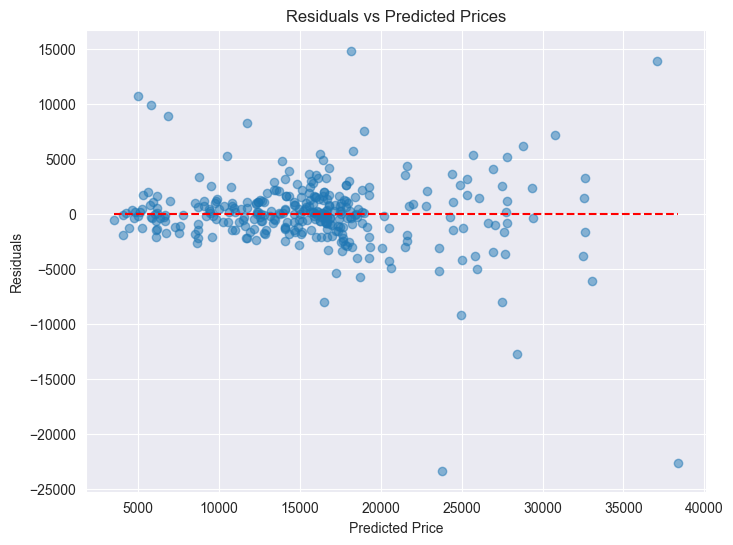

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(rf_optimized_preds, residuals, alpha=0.5)
plt.hlines(y=0, xmin=rf_optimized_preds.min(), xmax=rf_optimized_preds.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

# Histogram of Residuals

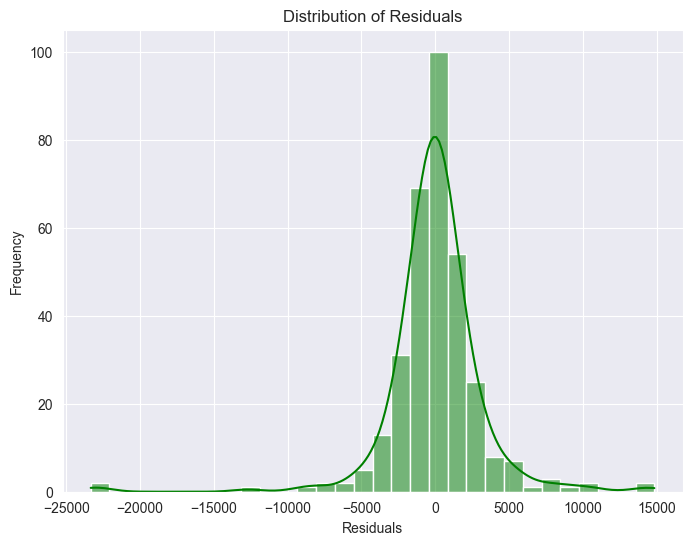

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Actual vs. Predicted Values (Scatter_Plot)

- A scatter plot of the actual vs. predicted car prices helps to visualize how well the model is performing.

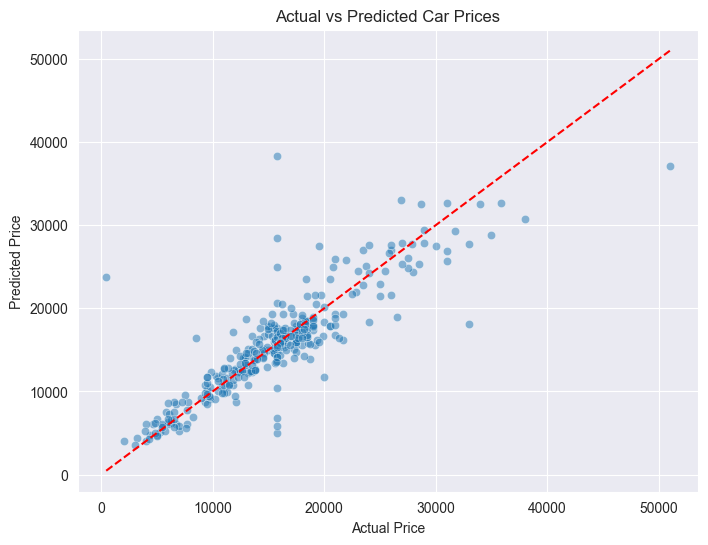

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val, y=rf_optimized_preds, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Feature Importance

- Random Forest models provide feature importances that helps to understand which features are most influential in predicting the car price.

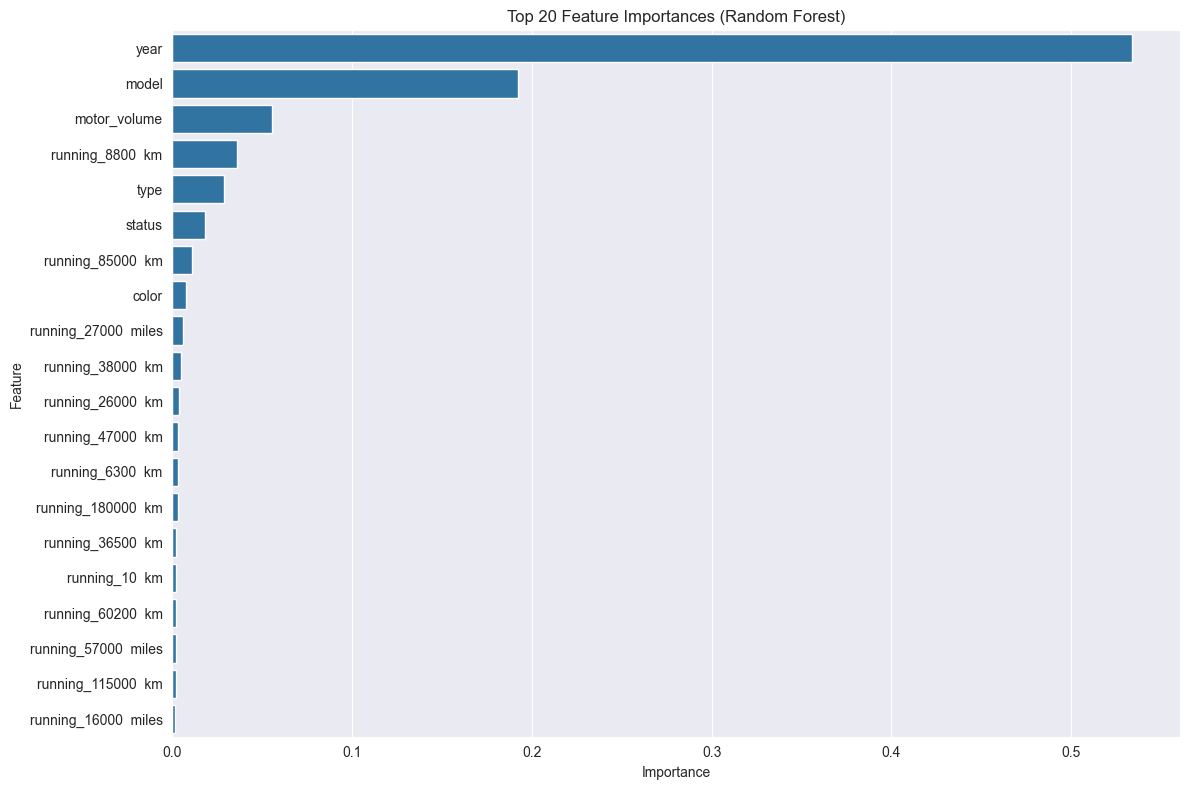

In [43]:
importances = best_rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
# Sort the features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select only the top 20 features
top_n = 20
feature_importance_top_n = feature_importance_df.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_top_n)
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Partial Dependence Plots

- Partial dependence plots (PDP) show the marginal effect of one or two features on the predicted outcome. This can provide insights into how certain features (like year or motor_volume) affect the car price.

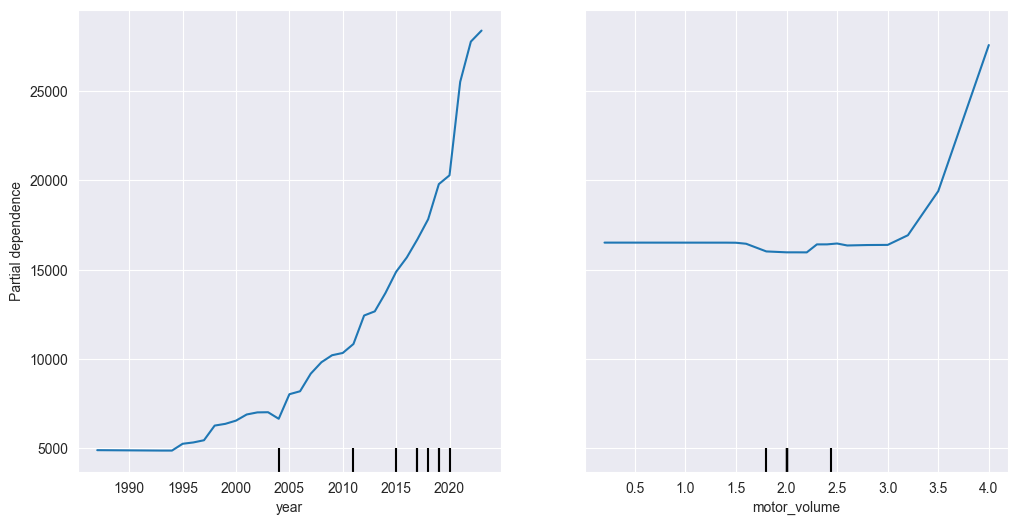

In [44]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

features_to_plot = ['year', 'motor_volume']
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_rf_model, X, features_to_plot, ax=ax)
plt.show()

# Learning Curve

- Plot learning curves to understand if the model benefits from more data or if it's suffering from high bias/variance.

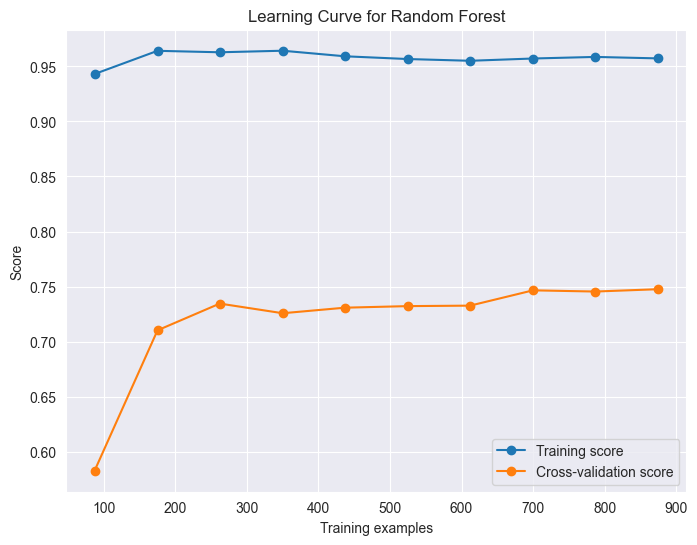

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Random Forest")
plt.legend(loc="best")
plt.show()

# Use the best model (Random Forest) to predict car prices on the test set

In [46]:
best_model = best_rf_model  # Random Forest is the best model based on MAE

# Predict on the test set

In [47]:
test_predictions = best_model.predict(test_data.drop(columns=['Id']))  # Exclude 'Id' column

# Prepare the submission format (Vehicle ID and Predicted Price)

In [48]:
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'price': test_predictions
})

# Save the predictions to a CSV file for submission

In [49]:
submission.to_csv('car_price_predictions.csv', index=False)

# Saving the Trained Best Model

In [50]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already trained `best_rf_model`
model_path = "rf_model2.pkl"

with open(model_path, "wb") as model_file:
    pickle.dump(best_rf_model, model_file)

print(f"Model successfully saved at {model_path}")


Model successfully saved at rf_model2.pkl


In [51]:
import pickle

# Save the OneHotEncoder used in training
encoder_path = "onehot_encoder.pkl"
with open(encoder_path, "wb") as encoder_file:
    pickle.dump(encoder, encoder_file)

print(f"OneHotEncoder successfully saved at {encoder_path}")


OneHotEncoder successfully saved at onehot_encoder.pkl
